<a href="https://colab.research.google.com/github/VictorFrancheto/Mathematics_and_Machine_Learning/blob/main/Redes_Neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neurais

#### Impotando Bibliotecas

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

* `torch.nn` é um módulo do PyTorch que fornece ferramentas para construir e rreinar redes neurais. Ele contém classes e funções pré-definidas para criar camadas, funções de ativação, funções de perda, otimizações e outros componentes essenciais para redes neurais.

**Componentes Principais:**

Camadas Neuronais (Layers): Permitem criar as arquiteturas das redes neurais, como perceptrons, convoluções ou redes recorrentes.

1. nn.Linear: Implementa uma camada totalmente conectada (fully connected).
2. nn.Conv2d: Para redes convolucionais (imagens).
3. nn.LSTM e nn.GRU: Para redes recorrentes.

O comando `import torch.optim as optim` importa o módulo de otimizadores do PyTorch, chamado `torch.optim`, permitindo que você utilize algoritmos de otimização para ajustar os parâmetros de redes neurais durante o treinamento.

Esses otimizadores atualizam os pesos do modelo usando o gradiente descendente ou variações avançadas dele, baseando-se nos gradientes calculados durante o *backpropagation*.

## Principais Funções e Classes de `torch.optim`

### Otimizadores Populares
Esses otimizadores são configurados após inicializar os parâmetros do modelo e especificar a taxa de aprendizado e outros hiperparâmetros.

- **`optim.SGD`**: Gradiente Descendente Estocástico (*Stochastic Gradient Descent*), base para muitos algoritmos.
- **`optim.Adam`**: Algoritmo mais avançado que combina os benefícios de `RMSProp` e `Momentum`.
- **`optim.RMSprop`**: Otimização robusta para redes profundas.
- **`optim.AdamW`**: Uma versão corrigida de `Adam`, usada especialmente em modelos grandes como *transformers*.


#### Função perda quantílica

A classe QuantileLoss herda de torch.nn.Module, o que a torna compatível com outros componentes do PyTorch, como modelos e otimizadores.
Isso permite que a função de perda seja usada no treinamento de redes neurais de forma padronizada.

O método __init__ inicializa a classe.

O parâmetro quantile define o quantil que você deseja usar, que deve ser um valor entre $[0, 1]$.

1. Exemplos:
0.5: Mediana (quantil 50%).
0.9: Quantil superior (90%).
0.1: Quantil inferior (10%).

-----
* super(QuantileLoss, self).\__init\__():

Chama o construtor da classe base (nn.Module) para inicializar os atributos padrão.

* self.quantile = quantile:

Armazena o valor do quantil em um atributo da classe, para que possa ser usado posteriormente.

------
------


### Fórmula Matemática

A função implementa a seguinte equação da **perda quantílica** (\(q\) é o quantil escolhido):

$$
L(y_{\text{true}}, y_{\text{pred}}) = \frac{1}{N} \sum_{i=1}^N \max\left( q \cdot (y_{\text{true},i} - y_{\text{pred},i}), \, (q - 1) \cdot (y_{\text{true},i} - y_{\text{pred},i}) \right)
$$

- $q$: Quantil fornecido pelo usuário (ex.: 0.5 para mediana, 0.9 para percentil superior).
- $\text{errors} = y_{\text{true}} - y_{\text{pred}}$:
  - Se o erro for **positivo**, penaliza proporcionalmente ao quantil (\(q\)).
  - Se o erro for **negativo**, penaliza proporcionalmente ao complemento do quantil (\(q - 1\)).



In [ ]:
# Função de perda quantílica
class QuantileLoss(nn.Module):
    def __init__(self, quantile):
        super(QuantileLoss, self).__init__()
        self.quantile = quantile
# Fução de perda quantílica
    def forward(self, y_pred, y_true):
        errors = y_true - y_pred
        return torch.mean(torch.maximum(self.quantile * errors, (self.quantile - 1) * errors))

#  Rede Neural

### Explicação Detalhada

#### Construtor `__init__`:
O método `__init__` é o construtor da classe, e nele definimos a arquitetura da rede. A rede é composta por três camadas lineares e duas funções de ativação ReLU.

- **`input_dim`**: Tamanho da entrada, fornecido pelo usuário.
- **`nn.Linear(input_dim, 64)`**: Primeira camada linear que mapeia a entrada para um vetor de 64 dimensões.
- **`nn.ReLU()`**: Função de ativação ReLU que introduz não-linearidade.
- **`nn.Linear(64, 64)`**: Segunda camada linear que mantém a dimensão de 64.
- **`nn.ReLU()`**: Outra função de ativação ReLU.
- **`nn.Linear(64, 1)`**: Última camada linear que reduz a dimensão para 1, produzindo a saída final.

#### Método `forward`:
O método `forward` define como os dados de entrada (`x`) são processados pela rede neural. Quando `x` é passado para o modelo, ele segue a sequência de camadas definidas no construtor.

- **`return self.model(x)`**: Passa os dados através da sequência de camadas e retorna a saída.

### Arquitetura da Rede Neural
A arquitetura da rede é composta por:

1. **Entrada**: Vetor de tamanho `input_dim`.
2. **Camada 1 (Linear)**: Mapeia a entrada para um vetor de 64 dimensões.
3. **Função de ativação**: ReLU.
4. **Camada 2 (Linear)**: Mapeia o vetor de 64 dimensões para outro vetor de 64 dimensões.
5. **Função de ativação**: ReLU.
6. **Camada de saída (Linear)**: Mapeia o vetor de 64 dimensões para uma única saída.


In [ ]:
# Rede Neural
class QuantileNN(nn.Module):
    def __init__(self, input_dim):
        super(QuantileNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

#### Inserindo os dados sintéticos

In [ ]:
# Dados gerados no R
np.random.seed(1)
n = 1000
x = np.sort(np.random.uniform(-4, 4, n))
y = 3 / (3 + 2 * np.abs(x)**3) + np.exp(-x**2) + np.cos(x) * np.sin(x) + np.random.normal(0, 0.3, n)

# Definindo a Partição dos Dados para Treino

### Explicação do Código

#### `torch.tensor(x, dtype=torch.float32):`

- **`torch.tensor(x)`**: Converte o array `x` (que pode ser uma lista, NumPy array ou outro formato) para um **tensor PyTorch**. Um tensor é a estrutura de dados básica usada no PyTorch.
- **`dtype=torch.float32`**: Especifica que o tensor deve ser do tipo **float32**, que é um tipo de ponto flutuante de precisão simples, comum em redes neurais.

#### `.reshape(-1, 1):`

- **`.reshape(-1, 1)`**: Modifica a forma (dimensões) do tensor. O `-1` significa que o PyTorch irá automaticamente calcular essa dimensão com base no tamanho total dos dados. O `1` especifica que o tensor terá uma única coluna (uma dimensão).
  - Se, por exemplo, `x` tiver 1000 elementos, depois de `reshape(-1, 1)`, o tensor terá a forma `(1000, 1)`, ou seja, 1000 linhas e 1 coluna.

#### `y_train:`

- A mesma transformação é aplicada à variável `y`, que também é convertida em um tensor de tipo `float32` e remodelada para ter 1 coluna, mantendo a consistência nas dimensões.


In [ ]:
x_train = torch.tensor(x, dtype=torch.float32).reshape(-1, 1)
y_train = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Configurando o modelo

### Explicação do Código

#### `quantile = 0.25:`
Define o quantil desejado para a perda quantílica. Aqui, `0.25` refere-se ao **primeiro quartil** (25%), significando que a rede neural será treinada para prever o valor que está abaixo de 25% dos dados de treinamento.

#### `model = QuantileNN(input_dim=1):`
Cria uma instância do modelo de rede neural `QuantileNN` com uma entrada de uma dimensão (`input_dim=1`). Isso indica que o modelo espera entradas com uma única característica (ex.: uma variável independente).

#### `criterion = QuantileLoss(quantile=quantile):`
Define a **função de perda** a ser usada para o treinamento, que é a **perda quantílica**. O quantil de 25% (ou `0.25`) é passado para o critério.

#### `optimizer = optim.Adam(model.parameters(), lr=0.01):`
Inicializa o **otimizador Adam**, que é uma variante do **gradiente descendente** que ajusta automaticamente a taxa de aprendizado. O `model.parameters()` é passado para o otimizador para que ele saiba quais parâmetros ajustar (pesos da rede). A **taxa de aprendizado** é definida como `0.01`.

#### `epochs = 500:`
Define o número de **épocas** (iterações sobre o conjunto de treinamento) como 500. O modelo será treinado por **500 ciclos** de atualização dos parâmetros.


In [ ]:
# Configuração do modelo
quantile = 0.9  # Quantil desejado (25%)
model = QuantileNN(input_dim=1)
criterion = QuantileLoss(quantile=quantile)
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 1000

# Treinamento do Modelo

### Explicação do Loop de Treinamento

#### `for epoch in range(epochs):`
Inicia o **loop de treinamento**, que irá iterar 500 vezes (uma vez por época).

#### `model.train():`
Coloca o **modelo em modo de treinamento**, ativando comportamentos específicos para o treinamento (como o dropout, caso existisse).

#### `optimizer.zero_grad():`
Zera os **gradientes acumulados** dos parâmetros do modelo. Isso é necessário porque, por padrão, o PyTorch acumula os gradientes ao longo das iterações para permitir cálculos eficientes de gradientes em múltiplos passos. Aqui, zeramos os gradientes a cada nova iteração.

#### `y_pred = model(x_train):`
Passa as **entradas de treinamento** (`x_train`) através do modelo para obter as **previsões** (`y_pred`).

#### `loss = criterion(y_pred, y_train):`
Calcula a **perda quantílica** entre as previsões do modelo (`y_pred`) e os valores reais de treinamento (`y_train`). O critério (`QuantileLoss`) avalia o quão bem o modelo se ajusta aos dados de treinamento.

#### `loss.backward():`
Realiza a **retropropagação** (**backpropagation**), que calcula os gradientes da função de perda em relação aos parâmetros do modelo.

#### `optimizer.step():`
Atualiza os **parâmetros do modelo** utilizando os gradientes calculados na etapa anterior. Essa atualização é feita pelo **otimizador Adam**, ajustando os pesos para reduzir a perda.

#### `if (epoch + 1) % 50 == 0:`
A cada **50 épocas**, o código imprime a informação sobre o progresso do treinamento. A função `loss.item()` retorna o valor da perda como um número em ponto flutuante.

#### `print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}"):`
Exibe o **número da época** e o **valor da perda** calculada, formatado para 4 casas decimais.


In [ ]:
# Treinamento
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

# Avaliação
model.eval()
with torch.no_grad():
    y_pred = model(x_train).numpy()

Epoch 50/1000, Loss: 0.0640
Epoch 100/1000, Loss: 0.0587
Epoch 150/1000, Loss: 0.0566
Epoch 200/1000, Loss: 0.0547
Epoch 250/1000, Loss: 0.0529
Epoch 300/1000, Loss: 0.0522
Epoch 350/1000, Loss: 0.0522
Epoch 400/1000, Loss: 0.0520
Epoch 450/1000, Loss: 0.0520
Epoch 500/1000, Loss: 0.0520
Epoch 550/1000, Loss: 0.0520
Epoch 600/1000, Loss: 0.0519
Epoch 650/1000, Loss: 0.0520
Epoch 700/1000, Loss: 0.0521
Epoch 750/1000, Loss: 0.0519
Epoch 800/1000, Loss: 0.0519
Epoch 850/1000, Loss: 0.0520
Epoch 900/1000, Loss: 0.0518
Epoch 950/1000, Loss: 0.0517
Epoch 1000/1000, Loss: 0.0518


# Visualização da modelagem

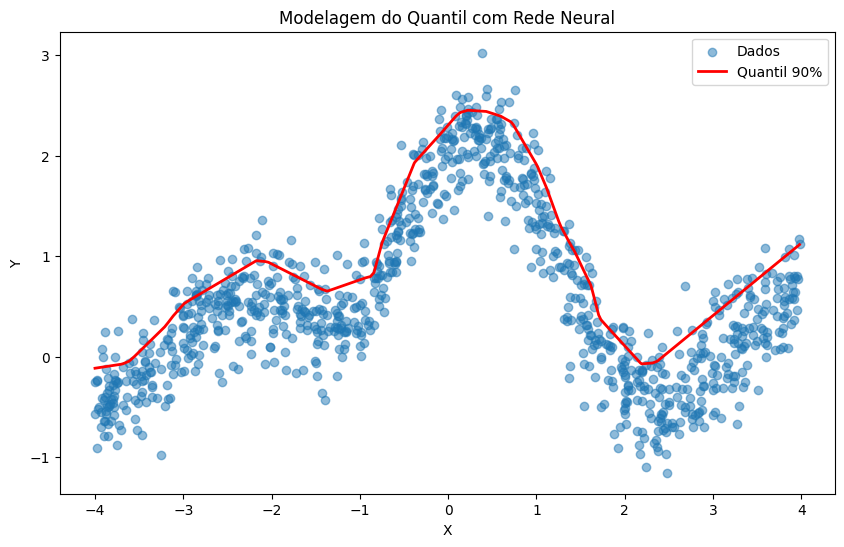

In [ ]:
# Visualização
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Dados", alpha=0.5)
plt.plot(x, y_pred, color="red", label=f"Quantil {quantile*100:.0f}%", linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Modelagem do Quantil com Rede Neural")
plt.legend()
plt.show()


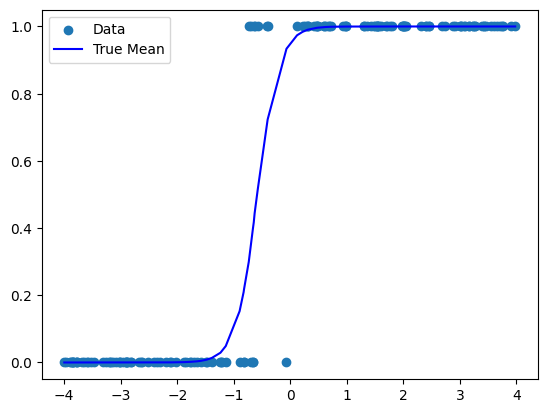

Epoch: 1, Loss Train: 0.5568, Loss Test: inf
Epoch: 2, Loss Train: 0.5173, Loss Test: inf
Epoch: 3, Loss Train: 0.4810, Loss Test: inf
Epoch: 4, Loss Train: 0.4479, Loss Test: inf
Epoch: 5, Loss Train: 0.4179, Loss Test: inf
Epoch: 6, Loss Train: 0.3908, Loss Test: inf
Epoch: 7, Loss Train: 0.3663, Loss Test: inf
Epoch: 8, Loss Train: 0.3442, Loss Test: inf
Epoch: 9, Loss Train: 0.3243, Loss Test: inf
Epoch: 10, Loss Train: 0.3064, Loss Test: 0.2562
Epoch: 11, Loss Train: 0.2902, Loss Test: 0.2562
Epoch: 12, Loss Train: 0.2756, Loss Test: 0.2562
Epoch: 13, Loss Train: 0.2624, Loss Test: 0.2562
Epoch: 14, Loss Train: 0.2505, Loss Test: 0.2562
Epoch: 15, Loss Train: 0.2397, Loss Test: 0.2562
Epoch: 16, Loss Train: 0.2299, Loss Test: 0.2562
Epoch: 17, Loss Train: 0.2210, Loss Test: 0.2562
Epoch: 18, Loss Train: 0.2130, Loss Test: 0.2562
Epoch: 19, Loss Train: 0.2056, Loss Test: 0.2562
Epoch: 20, Loss Train: 0.1988, Loss Test: 0.1594
Epoch: 21, Loss Train: 0.1926, Loss Test: 0.1594
Epoch: 

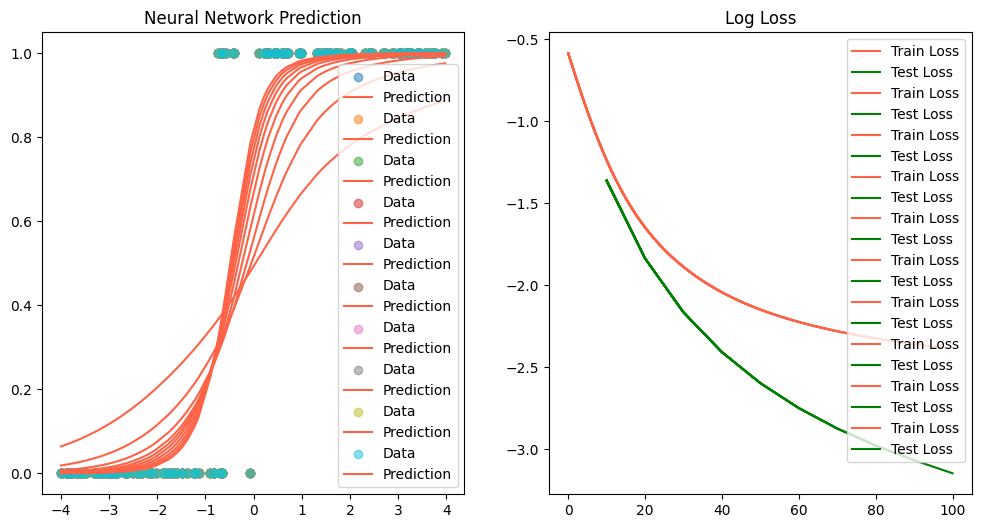

Final Epoch: 100, Loss Train: 0.0923, Loss Test: 0.0430


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class NeuralModelBER(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super(NeuralModelBER, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.GELU(),
            nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        y = self.seq(x)
        return torch.sigmoid(y)

def NEURAL_MODEL_BER(x, y, epochs=50, lr0=0.5, plot0=True, N=1, eps=1e-2, test=0.02):
    x = np.array(x).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)

    n = x.shape[0]
    test_size = int(n * test)
    indices = np.random.choice(n, test_size, replace=False)

    x_test, y_test = x[indices], y[indices]
    x_train, y_train = np.delete(x, indices, axis=0), np.delete(y, indices, axis=0)

    model = NeuralModelBER(input_size=1, output_size=1, hidden_size=N)
    optimizer = optim.AdamW(model.parameters(), lr=lr0)
    loss_fn = nn.BCELoss()

    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

    loss_store = []
    loss_store_test = []
    err = 100
    i = 0
    loss_test = float('inf')  # Initialize to avoid reference error

    plt.figure(figsize=(12, 6))

    while err > eps and i < epochs:
        i += 1
        model.train()
        optimizer.zero_grad()

        yhat = model(x_train_tensor)
        loss = loss_fn(yhat, y_train_tensor)
        loss.backward()
        optimizer.step()

        loss_store.append(loss.item())

        if i % 10 == 0 and plot0:
            model.eval()
            with torch.no_grad():
                yhat_test = model(x_test_tensor)
                loss_test = loss_fn(yhat_test, y_test_tensor).item()
                loss_store_test.append(loss_test)

                plt.subplot(1, 2, 1)
                plt.scatter(x, y, label="Data", alpha=0.5)
                plt.plot(x_train, model(x_train_tensor).detach().numpy(), color="tomato", label="Prediction")
                plt.title("Neural Network Prediction")
                plt.legend()

                plt.subplot(1, 2, 2)
                plt.plot(np.log(loss_store), label="Train Loss", color="tomato")
                plt.plot(range(10, i + 1, 10), np.log(loss_store_test), label="Test Loss", color="green")
                plt.title("Log Loss")
                plt.legend()

        print(f"Epoch: {i}, Loss Train: {loss.item():.4f}, Loss Test: {loss_test:.4f}")

    plt.show()

    print(f"Final Epoch: {i}, Loss Train: {loss.item():.4f}, Loss Test: {loss_test:.4f}")
    return model, loss.item(), i, err, list(model.parameters())

# Generating sample data
np.random.seed(1)
n = 150
x = np.sort(np.random.uniform(-1, 1, n)) * 4

def mu(x):
    theta0 = [3, 5]
    eta = theta0[0] + theta0[1] * x + np.sort(np.random.normal(0, 1, n))
    return np.exp(eta) / (1 + np.exp(eta))

y = np.random.binomial(1, mu(x))
plt.scatter(x, y, label="Data")
plt.plot(x, mu(x), color="blue", label="True Mean")
plt.legend()
plt.show()

torch.manual_seed(42)
fit = NEURAL_MODEL_BER(x, y, epochs=100, lr0=0.01, N=10, test=0.2)


# Rede Neural

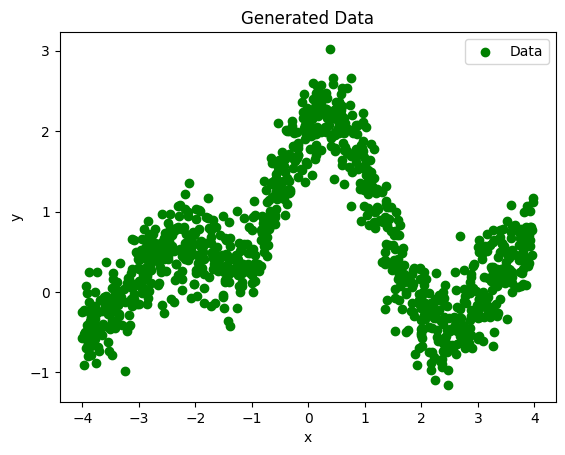

Epoch: 1, Loss Train: 0.4716, Loss Test: inf
Epoch: 2, Loss Train: 0.4586, Loss Test: inf
Epoch: 3, Loss Train: 0.4461, Loss Test: inf
Epoch: 4, Loss Train: 0.4343, Loss Test: inf
Epoch: 5, Loss Train: 0.4231, Loss Test: inf
Epoch: 6, Loss Train: 0.4129, Loss Test: inf
Epoch: 7, Loss Train: 0.4036, Loss Test: inf
Epoch: 8, Loss Train: 0.3953, Loss Test: inf
Epoch: 9, Loss Train: 0.3884, Loss Test: inf
Epoch: 10, Loss Train: 0.3830, Loss Test: 0.3526
Epoch: 11, Loss Train: 0.3787, Loss Test: 0.3526
Epoch: 12, Loss Train: 0.3751, Loss Test: 0.3526
Epoch: 13, Loss Train: 0.3721, Loss Test: 0.3526
Epoch: 14, Loss Train: 0.3696, Loss Test: 0.3526
Epoch: 15, Loss Train: 0.3675, Loss Test: 0.3526
Epoch: 16, Loss Train: 0.3656, Loss Test: 0.3526
Epoch: 17, Loss Train: 0.3638, Loss Test: 0.3526
Epoch: 18, Loss Train: 0.3620, Loss Test: 0.3526
Epoch: 19, Loss Train: 0.3600, Loss Test: 0.3526
Epoch: 20, Loss Train: 0.3580, Loss Test: 0.3295
Epoch: 21, Loss Train: 0.3559, Loss Test: 0.3295
Epoch: 

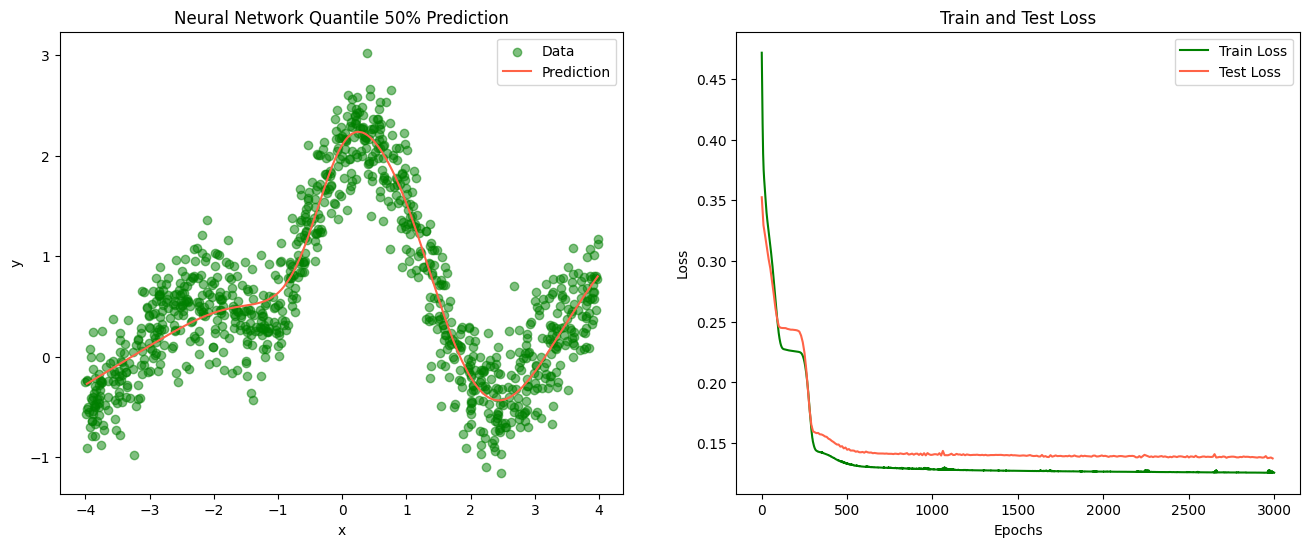

Epoch: 3000, Loss Train: 0.1257, Loss Test: 0.1375
Final Epoch: 3000, Loss Train: 0.1257, Loss Test: 0.1375


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class NeuralModelQuantile(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super(NeuralModelQuantile, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.GELU(),
            nn.Linear(hidden_size, output_size),
        )

    def forward(self, x):
        y = self.seq(x)
        return y  # Não aplica a função de ativação aqui para preservar a escala

def quantile_loss(y_true, y_pred, tau):
    e = y_true - y_pred
    return torch.mean(torch.maximum(tau * e, (tau - 1) * e))

def NEURAL_MODEL_QUANTILE(x, y, epochs=3000, lr0=0.01, plot0=True, N=5, tau=0.5, eps=1e-2, test=0.3):
    x = np.array(x).reshape(-1, 1)
    y = np.array(y).reshape(-1, 1)

    n = x.shape[0]
    test_size = int(n * test)
    indices = np.random.choice(n, test_size, replace=False)

    x_test, y_test = x[indices], y[indices]
    x_train, y_train = np.delete(x, indices, axis=0), np.delete(y, indices, axis=0)

    model = NeuralModelQuantile(input_size=1, output_size=1, hidden_size=N)
    optimizer = optim.AdamW(model.parameters(), lr=lr0)

    x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

    loss_store_train = []
    loss_store_test = []
    err = 100
    i = 0
    loss_test = float('inf')  # Initialize to avoid reference error

    # Initial plots
    plt.figure(figsize=(16, 6))

    while err > eps and i < epochs:
        i += 1
        model.train()
        optimizer.zero_grad()

        yhat_train = model(x_train_tensor)
        loss_train = quantile_loss(y_train_tensor, yhat_train, tau)
        loss_train.backward()
        optimizer.step()

        loss_store_train.append(loss_train.item())

        # Test loss calculation and plotting every 10 epochs or on the last epoch
        if i % 10 == 0 or i == epochs:
            model.eval()
            with torch.no_grad():
                yhat_test = model(x_test_tensor)
                loss_test = quantile_loss(y_test_tensor, yhat_test, tau).item()
                loss_store_test.append(loss_test)

                # Plotting the training and test loss
                if i == epochs:
                    plt.subplot(1, 2, 1)
                    plt.scatter(x, y, label="Data", alpha=0.5, color='green')
                    plt.plot(x_train, model(x_train_tensor).detach().numpy(), color="tomato", label="Prediction")
                    plt.title(f"Neural Network Quantile {tau*100:.0f}% Prediction")
                    plt.xlabel("x")
                    plt.ylabel("y")
                    plt.legend()

                    plt.subplot(1, 2, 2)
                    plt.plot(range(1, i + 1), loss_store_train, label="Train Loss", color="green")
                    plt.plot(range(1, len(loss_store_test) * 10 + 1, 10), loss_store_test, label="Test Loss", color="tomato")
                    plt.title("Train and Test Loss")
                    plt.xlabel("Epochs")
                    plt.ylabel("Loss")
                    plt.legend()
                    plt.show()

        print(f"Epoch: {i}, Loss Train: {loss_train.item():.4f}, Loss Test: {loss_test:.4f}")

    print(f"Final Epoch: {i}, Loss Train: {loss_train.item():.4f}, Loss Test: {loss_test:.4f}")
    return model, loss_train.item(), i, err, list(model.parameters())

# Gerando dados amostrais
np.random.seed(1)
n = 1000
x = np.sort(np.random.uniform(-4, 4, n))
y = 3 / (3 + 2 * np.abs(x) ** 3) + np.exp(-x ** 2) + np.cos(x) * np.sin(x) + np.random.normal(0, 0.3, n)

plt.scatter(x, y, label="Data", color='green')
plt.title("Generated Data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

torch.manual_seed(42)
fit = NEURAL_MODEL_QUANTILE(x, y, epochs=3000, lr0=0.01, N=5, tau=0.5, test=0.3)


Modelar o **quantil de 25%** (também conhecido como **primeiro quartil**) de $Y$ dado $X = x$ onde $Y|X = x \sim \mathcal{N}(\mu(x), \sigma^2(x))$ significa que estamos interessados em determinar o valor abaixo do qual 25% dos valores de $Y$ caem, condicionados a um valor específico de $X = x$.

Em outras palavras, queremos encontrar uma função que nos permita calcular o primeiro quartil da distribuição condicional de $Y$ dado $X = x$. Como sabemos que $Y|X = x$ segue uma distribuição normal com média $\mu(x)$ e variância $ \sigma^2(x)$, podemos utilizar as propriedades da distribuição normal para encontrar esse quantil.

### Cálculo do Quantil na Distribuição Normal

Para uma variável aleatória que segue uma distribuição normal $\mathcal{N}(\mu, \sigma^2)$, o quantil de ordem $q$ é dado por:

$$
Q_q = \mu + \sigma \cdot z_q
$$

onde:

- $Q_q$ é o quantil de ordem $q$ (no seu caso, $q = 0.25$ para o 25º quantil),
- $\mu$ é a média da distribuição,
- $\sigma$ é o desvio padrão (a raiz quadrada da variância $\sigma^2$,
- $z_q$ é o valor crítico correspondente ao quantil $q$ da distribuição normal padrão (com média 0 e variância 1).

Para a distribuição normal padrão, o valor crítico $z_q$ é tal que:

$$
P(Z \leq z_q) = q.
$$

No caso do 25º quantil:

$$
z_{0.25} = \Phi^{-1}(0.25) \approx -0.6745
$$

onde $\Phi^{-1}$ é a função quantil (função inversa da função de distribuição acumulada) da distribuição normal padrão.

### Aplicando ao Modelo Condicional \( Y|X = x \)

Aplicando isso à distribuição condicional \( Y|X = x \sim \mathcal{N}(\mu(x), \sigma^2(x)) \), o 25º quantil é dado por:

\[
Q_{0{,}25}(x) = \mu(x) + \sigma(x) \cdot z_{0{,}25}
\]

Substituindo o valor de \( z_{0{,}25} \):

\[
Q_{0{,}25}(x) = \mu(x) - 0{,}6745 \cdot \sigma(x)
\]

### Interpretando o Modelo

Modelar o quantil 25% de \( Y|X = x \) significa que estamos interessados em:

1. **Estimativa de \( \mu(x) \) e \( \sigma(x) \)**: Encontrar funções que descrevem como a média e o desvio padrão de \( Y \) variam em relação a \( X = x \).

2. **Cálculo do Quantil Condicional**: Utilizar essas estimativas para calcular o valor específico de \( Y \) abaixo do qual 25% dos dados se encontram, dado um valor de \( X = x \).

3. **Análise de Risco ou Comportamento Extremo**: Em muitas aplicações, especialmente em finanças, seguros e gestão de riscos, modelar quantis inferiores (como o 25º quantil) ajuda a entender o comportamento de perdas ou eventos adversos.

### Exemplos de Aplicação

- **Finanças**: Determinar o valor abaixo do qual 25% dos retornos financeiros caem, dado um conjunto de condições de mercado representadas por \( X \).

- **Medicina**: Estimar o nível inferior de resposta a um tratamento médico em relação a características do paciente \( X \).

- **Meteorologia**: Prever temperaturas mínimas esperadas em 25% dos dias, dado um conjunto de condições atmosféricas.

### Resumo

Modelar o quantil 25% de \( Y|X = x \) quando \( Y|X = x \) segue uma distribuição normal implica:

- **Compreender a distribuição condicional** de \( Y \) dado \( X = x \) em termos de sua média \( \mu(x) \) e desvio padrão \( \sigma(x) \).

- **Calcular o valor do quantil** usando a relação:

  \[
  Q_{0{,}25}(x) = \mu(x) - 0{,}6745 \cdot \sigma(x)
  \]

- **Desenvolver modelos ou métodos** (como regressão linear, regressão não linear ou redes neurais) para estimar \( \mu(x) \) e \( \sigma(x) \) com base em dados observados.

- **Utilizar esses modelos para previsões** e tomadas de decisão que considerem a variabilidade e a incerteza inerentes aos dados.

### Nota Final

Ao modelar o quantil 25%, estamos focando na parte inferior da distribuição de \( Y \) dado \( X = x \), o que pode ser crucial para análises que buscam entender e mitigar riscos ou identificar casos abaixo de um determinado limiar de interesse.

In [ ]:
library(torch)
library(ggplot2)

# Define o modelo de rede neural
Modelo_normal <- nn_module(
  initialize = function(input_dim, oculta_dim, output_dim) {
    self$mu_camada <- nn_sequential(
      nn_linear(input_dim, oculta_dim),
      nn_relu(),
      nn_linear(oculta_dim, output_dim)
    )
    self$sigma_camada <- nn_sequential(
      nn_linear(input_dim, oculta_dim),
      nn_relu(),
      nn_linear(oculta_dim, output_dim)
    )
  },
  forward = function(x) {
    mu <- self$mu_camada(x)
    log_sigma <- self$sigma_camada(x)
    list(mu = mu, log_sigma = log_sigma)
  }
)

# Dados simulados
set.seed(1)
n <- 1000
x <- torch_tensor(matrix(sort(runif(n, -4, 4))))
y <- torch_tensor(3 / (3 + 2 * abs(x)^3) + exp(-x^2) + cos(x) * sin(x) + rnorm(n) * 0.3)

# Divisão em treino (80%) e teste (20%)
train_idx <- sample(1:n, size = 0.8 * n)
test_idx <- setdiff(1:n, train_idx)

x_train <- x[train_idx, , drop = FALSE]
y_train <- y[train_idx]

x_test <- x[test_idx, , drop = FALSE]
y_test <- y[test_idx]

# Parâmetros do modelo
input_dim <- 1
oculta_dim <- 8
output_dim <- 1
modelo <- Modelo_normal(input_dim, oculta_dim, output_dim)

# Função de perda (log-verossimilhança negativa)
func_perda <- function(mu, log_sigma, y) {
  sigma <- torch_exp(log_sigma)
  -(torch_mean(-0.5 * torch_log(2 * pi * sigma^2) - ((y - mu)^2) / (2 * sigma^2)))
}

# Função de otimização
func_otimizacao <- optim_adam(modelo$parameters, lr = 0.01)

# Listas para armazenar perdas
perdas_treino <- numeric()
perdas_teste <- numeric()

# Treinamento
epochs <- 1000
for (epoch in 1:epochs) {
  # Passo de treino
  func_otimizacao$zero_grad()
  preds_train <- modelo(x_train)
  perda_train <- func_perda(preds_train$mu, preds_train$log_sigma, y_train)
  perda_train$backward()
  func_otimizacao$step()

  # Cálculo da perda no teste
  preds_test <- modelo(x_test)
  perda_test <- func_perda(preds_test$mu, preds_test$log_sigma, y_test)

  # Armazenar perdas
  perdas_treino <- c(perdas_treino, perda_train$item())
  perdas_teste <- c(perdas_teste, perda_test$item())

  # Exibição das perdas a cada 100 épocas
  if (epoch %% 100 == 0) {
    cat(sprintf("Epoch: %d, Perda Treino: %.4f, Perda Teste: %.4f\n",
                epoch, perda_train$item(), perda_test$item()))
  }
}

# Criar um dataframe para as perdas
df_perdas <- data.frame(
  Epoca = rep(1:epochs, 2),
  Perda = c(perdas_treino, perdas_teste),
  Tipo = rep(c("Treino", "Teste"), each = epochs)
)

# Plotar as curvas de perda
ggplot(df_perdas, aes(x = Epoca, y = Perda, color = Tipo)) +
  geom_line() +
  labs(
    title = "Curvas de Perda Durante o Treinamento",
    x = "Época",
    y = "Perda",
    color = "Conjunto"
  ) +
  theme_minimal()


SyntaxError: invalid syntax (<ipython-input-2-9a486ede7580>, line 6)

Epoch 100/1000, Loss Train: 0.3977, Loss Test: 62.8106
Epoch 200/1000, Loss Train: 0.3286, Loss Test: 22.3790
Epoch 300/1000, Loss Train: 0.3225, Loss Test: 23.2577
Epoch 400/1000, Loss Train: 0.3204, Loss Test: 24.2268
Epoch 500/1000, Loss Train: 0.3187, Loss Test: 25.4651
Epoch 600/1000, Loss Train: 0.3168, Loss Test: 26.1657
Epoch 700/1000, Loss Train: 0.3146, Loss Test: 26.4560
Epoch 800/1000, Loss Train: 0.3124, Loss Test: 25.9979
Epoch 900/1000, Loss Train: 0.3104, Loss Test: 25.7540
Epoch 1000/1000, Loss Train: 0.3091, Loss Test: 25.2042


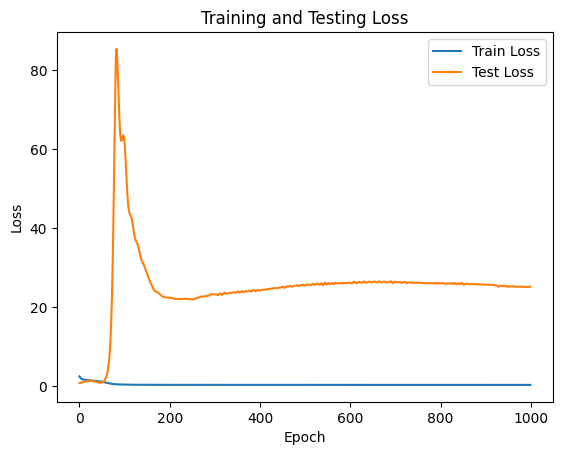

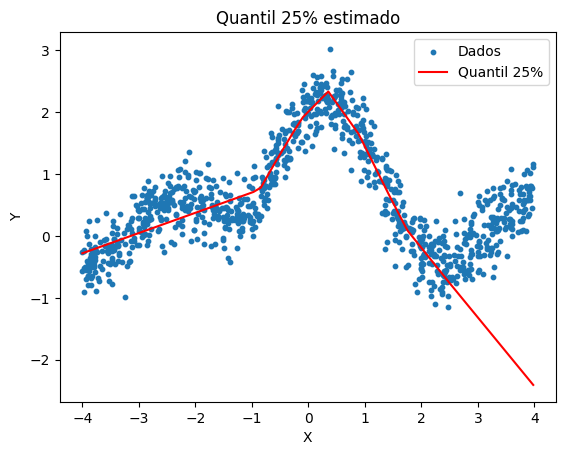

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Gerar os dados simulados
np.random.seed(1)
n = 1000
x = np.sort(np.random.uniform(-4, 4, n))
y = 3 / (3 + 2 * np.abs(x)**3) + np.exp(-x**2) + np.cos(x) * np.sin(x) + np.random.normal(0, 0.3, n)

x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)  # Entrada X
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)  # Saída Y

# Divisão em treino e teste
train_size = int(0.8 * n)
x_train, x_test = x_tensor[:train_size], x_tensor[train_size:]
y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

# Definir a rede neural
class QuantileNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(QuantileNN, self).__init__()
        self.mu_layer = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
        self.sigma_layer = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        mu = self.mu_layer(x)
        log_sigma = self.sigma_layer(x)  # Estimar log(sigma) para garantir positividade
        return mu, log_sigma

# Instanciar o modelo
input_dim = 1
hidden_dim = 8
output_dim = 1
model = QuantileNN(input_dim, hidden_dim, output_dim)

# Função de perda baseada no quantil
def quantile_loss(mu, log_sigma, y, p):
    sigma = torch.exp(log_sigma)
    z = (y - mu) / sigma
    quantile_term = norm.ppf(p)  # Quantil da normal padrão
    likelihood = -0.5 * torch.log(2 * torch.tensor(np.pi)) - log_sigma - 0.5 * ((z - quantile_term)**2)
    return -torch.mean(likelihood)

# Configuração do otimizador
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Treinamento
epochs = 1000
quantile_p = 0.25  # Definir o quantil a ser modelado
losses_train = []
losses_test = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    mu_train, log_sigma_train = model(x_train)
    loss_train = quantile_loss(mu_train, log_sigma_train, y_train, quantile_p)
    loss_train.backward()
    optimizer.step()
    losses_train.append(loss_train.item())

    # Avaliar no conjunto de teste
    model.eval()
    with torch.no_grad():
        mu_test, log_sigma_test = model(x_test)
        loss_test = quantile_loss(mu_test, log_sigma_test, y_test, quantile_p)
        losses_test.append(loss_test.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss Train: {loss_train.item():.4f}, Loss Test: {loss_test.item():.4f}")

# Plotar as curvas de perda
plt.plot(losses_train, label="Train Loss")
plt.plot(losses_test, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Testing Loss")
plt.legend()
plt.show()

# Predição
model.eval()
with torch.no_grad():
    mu_pred, log_sigma_pred = model(x_tensor)
    mu_pred = mu_pred.numpy().flatten()
    sigma_pred = np.exp(log_sigma_pred.numpy().flatten())
    quantile_pred = mu_pred + sigma_pred * norm.ppf(quantile_p)

# Plotar os dados e o quantil predito
plt.scatter(x, y, s=10, label="Dados")
plt.plot(x, quantile_pred, color="red", label=f"Quantil {quantile_p*100:.0f}%")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title(f"Quantil {quantile_p*100:.0f}% estimado")
plt.show()


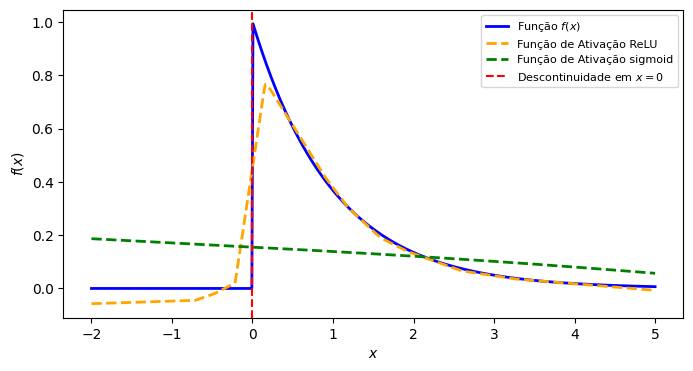

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the target function
def target_function(x):
    return np.where(x >= 0, np.exp(-x), 0)

# Generate sample data
x = np.linspace(-2, 5, 500).reshape(-1, 1)  # Input domain
y = target_function(x).ravel()  # Target values

# Neural Network with ReLU Activation (Improved)
relu_model = MLPRegressor(
    hidden_layer_sizes=(50,),  # Increased number of neurons
    activation="relu",
    solver="adam",
    max_iter=10000,  # Increased training iterations
    random_state=42,
    learning_rate_init=0.01  # Set an appropriate learning rate
)
relu_model.fit(x, y)
y_pred_relu = relu_model.predict(x)

# Neural Network with Sigmoid Activation
sigmoid_model = MLPRegressor(
    hidden_layer_sizes=(50,),  # Increased number of neurons
    activation="logistic",  # Sigmoid activation
    solver="adam",
    max_iter=10000,  # Increased training iterations
    random_state=42,
    learning_rate_init=0.01  # Set an appropriate learning rate
)
sigmoid_model.fit(x, y)
y_pred_sigmoid = sigmoid_model.predict(x)

# Plot the results
plt.figure(figsize=(8, 4))  # Reduced figure size
plt.plot(x, y, label="Função $f(x)$", color="blue", linewidth=2)
plt.plot(x, y_pred_relu, label="Função de Ativação ReLU", color="orange", linestyle="--", linewidth=2)
plt.plot(x, y_pred_sigmoid, label="Função de Ativação sigmoid", color="green", linestyle="--", linewidth=2)
plt.axvline(0, color="red", linestyle="--", label="Descontinuidade em $x=0$")
#plt.title("Comparison of ReLU and Sigmoid Neural Networks")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(fontsize=8)  # Reduced legend font size
plt.show()


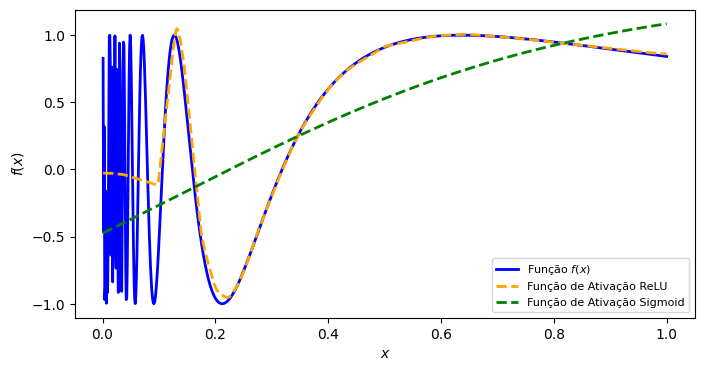

In [ ]:
# Updated implementation with increased layers for better approximation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the target function
def target_function(x):
    return np.where(x == 0, 0, np.sin(1 / x))

# Generate sample data (denser near x=0)
x = np.linspace(0.001, 1, 1000).reshape(-1, 1)  # Densified around 0
y = target_function(x).ravel()  # Target values

# Neural Network with ReLU Activation (Increased layers and neurons)
relu_model = MLPRegressor(
    hidden_layer_sizes=(100, 100, 100),  # Increased number of layers and neurons
    activation="relu",
    solver="adam",
    max_iter=20000,  # Increased training iterations
    random_state=42,
    learning_rate_init=0.005  # Adjusted learning rate
)
relu_model.fit(x, y)
y_pred_relu = relu_model.predict(x)

# Neural Network with Sigmoid Activation (Increased layers and neurons)
sigmoid_model = MLPRegressor(
    hidden_layer_sizes=(100, 100, 100),  # Increased number of layers and neurons
    activation="logistic",  # Sigmoid activation
    solver="adam",
    max_iter=20000,  # Increased training iterations
    random_state=42,
    learning_rate_init=0.005  # Adjusted learning rate
)
sigmoid_model.fit(x, y)
y_pred_sigmoid = sigmoid_model.predict(x)

# Plot the results
plt.figure(figsize=(8, 4))  # Reduced figure size
plt.plot(x, y, label="Função $f(x)$", color="blue", linewidth=2)
plt.plot(x, y_pred_relu, label="Função de Ativação ReLU", color="orange", linestyle="--", linewidth=2)
plt.plot(x, y_pred_sigmoid, label="Função de Ativação Sigmoid", color="green", linestyle="--", linewidth=2)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(fontsize=8)  # Reduced legend font size
plt.show()


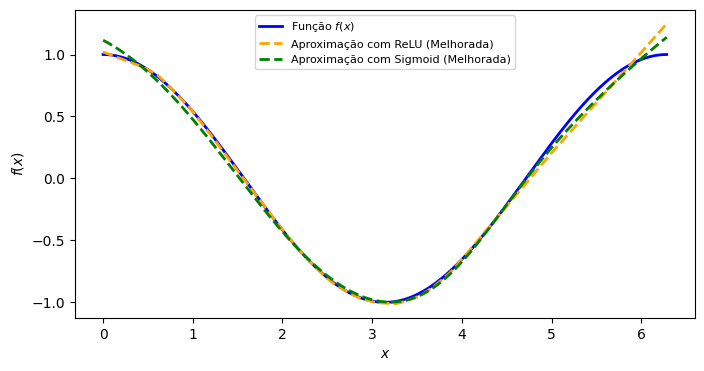

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Define the target function
def target_function(x):
    return np.cos(x)

# Generate sample data
x = np.linspace(0, 2 * np.pi, 500).reshape(-1, 1)  # Input domain from 0 to 2π
y = target_function(x).ravel()  # Target values

# Neural Network with ReLU Activation (Improved)
relu_model = MLPRegressor(
    hidden_layer_sizes=(100, 100),  # Two hidden layers with 100 neurons each
    activation="relu",
    solver="adam",
    max_iter=10000,  # Increased training iterations
    random_state=42,
    learning_rate_init=0.005  # Reduced learning rate for better convergence
)
relu_model.fit(x, y)
y_pred_relu = relu_model.predict(x)

# Neural Network with Sigmoid Activation (Improved)
sigmoid_model = MLPRegressor(
    hidden_layer_sizes=(100, 100),  # Two hidden layers with 100 neurons each
    activation="logistic",  # Sigmoid activation
    solver="adam",
    max_iter=10000,  # Increased training iterations
    random_state=42,
    learning_rate_init=0.005  # Reduced learning rate for better convergence
)
sigmoid_model.fit(x, y)
y_pred_sigmoid = sigmoid_model.predict(x)

# Plot the results
plt.figure(figsize=(8, 4))
plt.plot(x, y, label="Função $f(x)$", color="blue", linewidth=2)
plt.plot(x, y_pred_relu, label="Aproximação com ReLU (Melhorada)", color="orange", linestyle="--", linewidth=2)
plt.plot(x, y_pred_sigmoid, label="Aproximação com Sigmoid (Melhorada)", color="green", linestyle="--", linewidth=2)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
#plt.title("Aproximação de $f(x) = \cos(x)$ no intervalo $[0, 2\pi]$")
plt.legend(fontsize=8)
plt.show()
